# SOLAR POWER FORECASTING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

READING THE DATA


In [2]:
production = pd.read_csv("time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | s.startswith('DE')),
                        parse_dates=[0], index_col=0)

In [39]:
production.head(4)
#printing top 4 rows

,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,...,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,40126.0,38163.0,38631.0,0.0,0.0,32812.0,8579.0,0.2614,2162.0,2285.0,...,13311.0,13038.0,0.0,5615.0,2262.0,3352.0,4652.0,3892.0,0.0,25.0
2016-01-01 01:00:00+00:00,38429.0,36769.0,38631.0,0.0,0.0,32812.0,8542.0,0.2603,2162.0,2229.0,...,12598.0,12245.0,0.0,5497.0,2218.0,3279.0,4431.0,3705.0,0.0,24.0
2016-01-01 02:00:00+00:00,37484.0,36452.0,38631.0,0.0,0.0,32812.0,8443.0,0.2573,2162.0,2011.0,...,12056.0,11980.0,0.0,5439.0,2005.0,3434.0,4325.0,3678.0,0.0,17.0
2016-01-01 03:00:00+00:00,37150.0,36578.0,38631.0,0.0,0.0,32812.0,8295.0,0.2528,2162.0,1943.0,...,11886.0,11784.0,0.0,5451.0,1930.0,3521.0,4337.0,3803.0,0.0,20.0


In [4]:
production = production.loc[production.index.year == 2016, :]
# we are analyzing on the 2016 data 

In [5]:
production.head(3)


,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,...,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,40126.0,38163.0,38631.0,0.0,0.0,32812.0,8579.0,0.2614,2162.0,2285.0,...,13311.0,13038.0,0.0,5615.0,2262.0,3352.0,4652.0,3892.0,0.0,25.0
2016-01-01 01:00:00+00:00,38429.0,36769.0,38631.0,0.0,0.0,32812.0,8542.0,0.2603,2162.0,2229.0,...,12598.0,12245.0,0.0,5497.0,2218.0,3279.0,4431.0,3705.0,0.0,24.0
2016-01-01 02:00:00+00:00,37484.0,36452.0,38631.0,0.0,0.0,32812.0,8443.0,0.2573,2162.0,2011.0,...,12056.0,11980.0,0.0,5439.0,2005.0,3434.0,4325.0,3678.0,0.0,17.0


In [40]:
production.tail(4)


,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,...,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-12-31 20:00:00+00:00,47558.0,44496.0,40085.0,0.0,0.0,37145.0,15354.0,0.4134,2587.0,3304.0,...,15667.0,15458.0,0.0,9152.0,2972.0,6180.0,5973.0,5415.0,0.0,32.0
2016-12-31 21:00:00+00:00,47600.0,44702.0,40085.0,0.0,0.0,37145.0,14847.0,0.3997,2587.0,3306.0,...,15838.0,15506.0,0.0,8741.0,2975.0,5766.0,6208.0,5574.0,0.0,38.0
2016-12-31 22:00:00+00:00,46117.0,41879.0,40085.0,0.0,0.0,37145.0,15056.0,0.4053,2587.0,3308.0,...,15403.0,14464.0,0.0,8750.0,2976.0,5774.0,6071.0,5312.0,0.0,55.0
2016-12-31 23:00:00+00:00,44802.0,39438.0,40089.0,0.0,0.0,37149.0,15422.0,0.4151,2591.0,3303.0,...,14810.0,12014.0,0.0,8792.0,2971.0,5821.0,5953.0,4617.0,0.0,69.0


In [7]:
production.info()
# we mainly need to work on solar_generation_actual and wind_generation actual

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00+00:00 to 2016-12-31 23:00:00+00:00
Data columns (total 41 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   DE_load_actual_entsoe_transparency               8784 non-null   float64
 1   DE_load_forecast_entsoe_transparency             8784 non-null   float64
 2   DE_solar_capacity                                8784 non-null   float64
 3   DE_solar_generation_actual                       8712 non-null   float64
 4   DE_solar_profile                                 8712 non-null   float64
 5   DE_wind_capacity                                 8784 non-null   float64
 6   DE_wind_generation_actual                        8710 non-null   float64
 7   DE_wind_profile                                  8710 non-null   float64
 8   DE_wind_offshore_capacity                        8784 non-nu

(0.0, 27000.0)

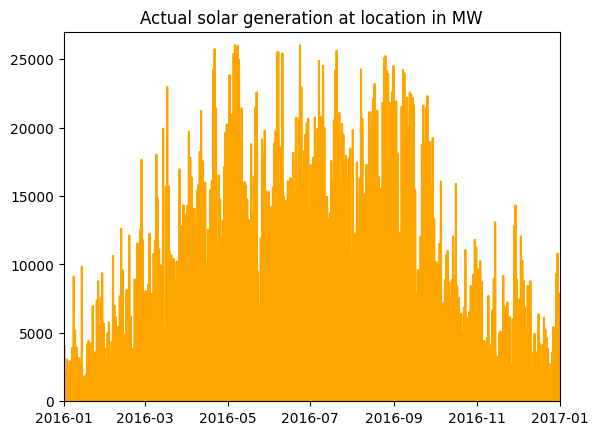

In [42]:
# create plot
plt.plot(production.index, production['DE_solar_generation_actual'], c='Orange')
plt.title('Actual solar generation at location in MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 27000)



(0.0, 35000.0)

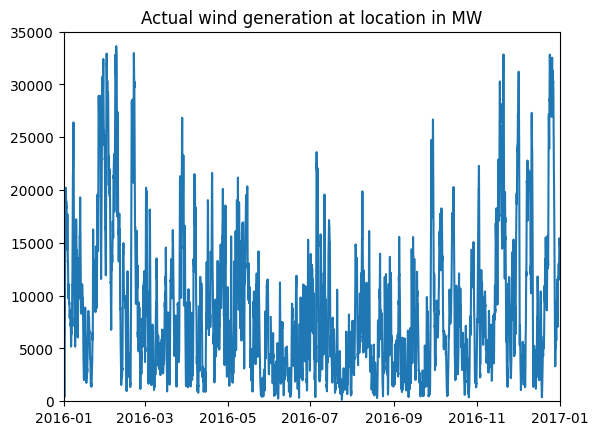

In [43]:
plt.plot(production.index, production['DE_wind_generation_actual'])
plt.title('Actual wind generation at location in MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 35000)



In [10]:
production_wind_solar = production[['DE_wind_generation_actual', 'DE_solar_generation_actual']]


In [11]:
weather = pd.read_csv("weather_data_GER_2016.csv",
                     parse_dates=[0], index_col=0)

In [12]:
weather.head(3)


,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01 01:00:00+00:00,1,47.5,5.625,0.77,1.61,2.63,2,10,0.052510,0.0,0.0,277.025665,1.239390,99300.164062
2016-01-01 02:00:00+00:00,2,47.5,5.625,0.66,1.22,1.89,2,10,0.052495,0.0,0.0,277.223755,1.243861,99310.992188


In [13]:
weather.tail(3)


,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-12-31 21:00:00+00:00,8781,55.0,15.0,10.49,12.65,14.38,2,10,0.001014,0.0,0.0,278.634644,1.270996,101653.398438
2016-12-31 22:00:00+00:00,8782,55.0,15.0,10.47,12.63,14.41,2,10,0.001009,0.0,0.0,278.678162,1.270252,101609.484375
2016-12-31 23:00:00+00:00,8783,55.0,15.0,10.39,12.53,14.33,2,10,0.000993,0.0,0.0,278.720184,1.269202,101545.859375


In [14]:
weather.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2248704 entries, 2016-01-01 00:00:00+00:00 to 2016-12-31 23:00:00+00:00
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   cumulated hours  int64  
 1   lat              float64
 2   lon              float64
 3   v1               float64
 4   v2               float64
 5   v_50m            float64
 6   h1               int64  
 7   h2               int64  
 8   z0               float64
 9   SWTDN            float64
 10  SWGDN            float64
 11  T                float64
 12  rho              float64
 13  p                float64
dtypes: float64(11), int64(3)
memory usage: 257.3 MB


In [15]:
weather.loc[weather.index == '2016-01-01 00:00:00', :]


,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01 00:00:00+00:00,0,47.5,6.250,0.85,1.77,3.69,2,10,0.163823,0.0,0.0,277.609924,1.226037,98194.710938
2016-01-01 00:00:00+00:00,0,47.5,6.875,0.94,1.94,3.79,3,11,0.286626,0.0,0.0,276.850159,1.205101,96186.710938
2016-01-01 00:00:00+00:00,0,47.5,7.500,0.84,1.68,2.82,2,10,0.109472,0.0,0.0,276.414612,1.200341,95874.710938
2016-01-01 00:00:00+00:00,0,47.5,8.125,0.74,1.56,2.51,2,10,0.066503,0.0,0.0,276.039612,1.202233,96050.710938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01 00:00:00+00:00,0,55.0,12.500,3.71,4.36,5.06,2,10,0.006501,0.0,0.0,277.781799,1.280602,102218.710938
2016-01-01 00:00:00+00:00,0,55.0,13.125,3.82,4.34,4.69,2,10,0.002311,0.0,0.0,277.668518,1.283288,102282.710938
2016-01-01 00:00:00+00:00,0,55.0,13.750,3.75,4.23,4.61,2,10,0.003382,0.0,0.0,276.957581,1.287438,102290.710938


In [16]:
2248704/256


8784.0

In [17]:
weather_by_day = weather.groupby(weather.index).mean()



In [18]:
weather_by_day.head(24)


,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.000000,0.000000,275.296747,1.253185,99281.007812
2016-01-01 01:00:00+00:00,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.000000,0.000000,275.255473,1.253778,99288.492188
2016-01-01 02:00:00+00:00,2.0,51.25,10.3125,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.000000,0.000000,275.217089,1.254304,99296.398438
2016-01-01 03:00:00+00:00,3.0,51.25,10.3125,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.000000,0.000000,275.211715,1.254562,99306.695312
2016-01-01 04:00:00+00:00,4.0,51.25,10.3125,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.000000,0.000000,275.193369,1.254733,99319.750000
2016-01-01 05:00:00+00:00,5.0,51.25,10.3125,2.207227,3.160312,4.445078,2.546875,10.546875,0.164153,0.000000,0.000000,275.184228,1.254969,99336.710938
2016-01-01 06:00:00+00:00,6.0,51.25,10.3125,2.099336,3.027148,4.291758,2.546875,10.546875,0.164116,0.029503,0.002406,275.151314,1.255247,99357.078125
2016-01-01 07:00:00+00:00,7.0,51.25,10.3125,2.001992,2.903750,4.116836,2.542969,10.542969,0.164068,32.701265,4.885147,275.175961,1.255487,99383.765625
2016-01-01 08:00:00+00:00,8.0,51.25,10.3125,2.061836,2.915977,3.855273,2.542969,10.542969,0.164031,167.523132,34.330536,275.612767,1.255295,99415.406250


(0.0, 12.0)

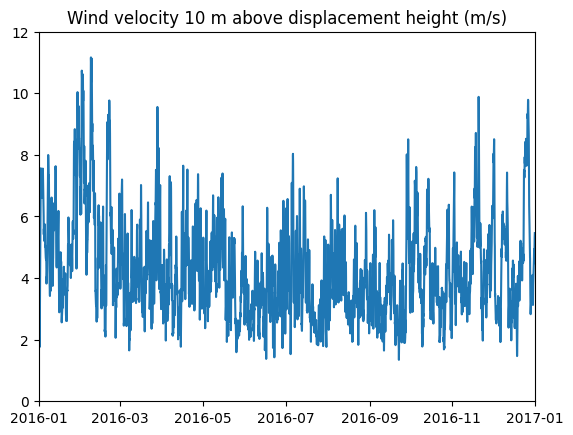

In [19]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['v2'])
plt.title('Wind velocity 10 m above displacement height (m/s)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 12)

# save plot



(0.0, 1000.0)

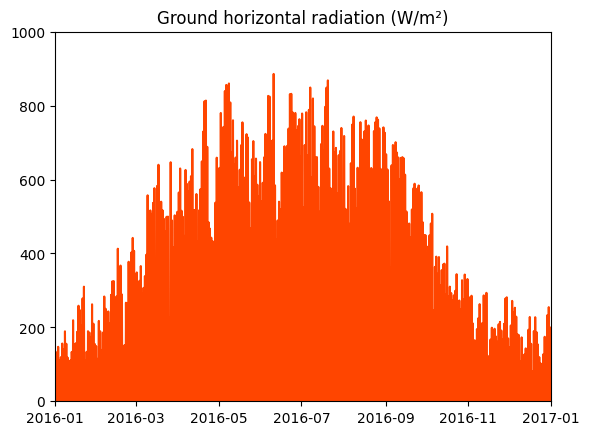

In [20]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['SWGDN'], c='OrangeRed')
plt.title('Ground horizontal radiation (W/m²)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 1000)

# save plot


(263.0, 303.0)

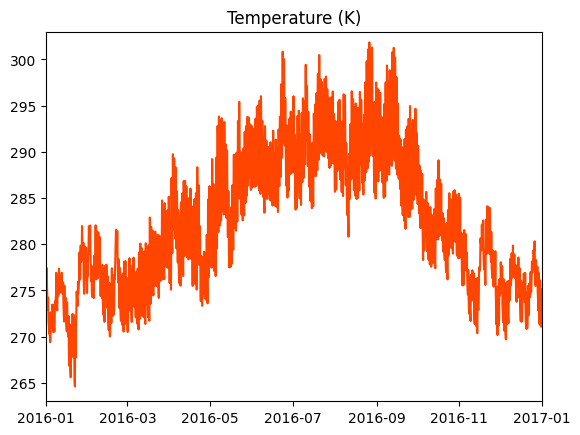

In [21]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['T'], c='OrangeRed')
plt.title('Temperature (K)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(263, 303)

# save plot


In [22]:
weather_by_day['T (C)'] = weather_by_day['T'] - 273.15


(-10.0, 30.0)

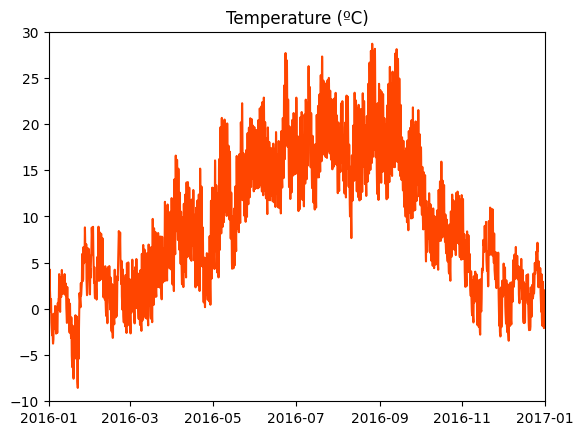

In [23]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['T (C)'], c='OrangeRed')
plt.title('Temperature (ºC)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(-10, 30)

(16801.0, 17167.0)

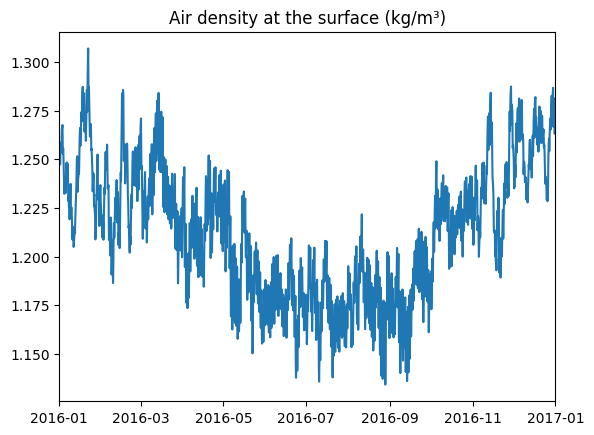

In [24]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['rho'])
plt.title('Air density at the surface (kg/m³)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))


(16801.0, 17167.0)

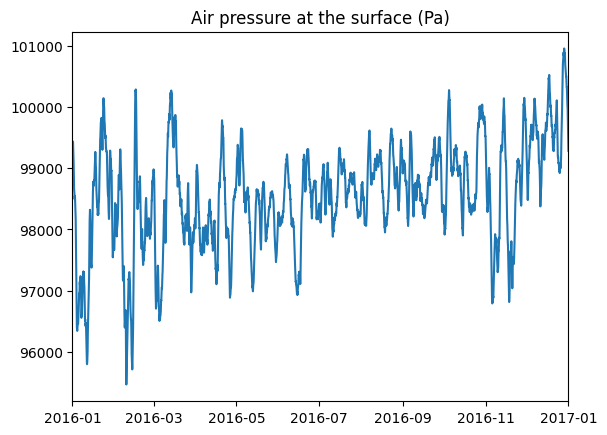

In [25]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['p'])
plt.title('Air pressure at the surface (Pa)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))


In [26]:
# merge production_wind_solar and weather_by_day DataFrames
combined = pd.merge(production_wind_solar, weather_by_day, how='left', left_index=True, right_index=True)

# drop redundant 'T (C)' column
combined = combined.drop('T (C)', axis=1)


In [27]:
combined.head()


,DE_wind_generation_actual,DE_solar_generation_actual,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
utc_timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,8579.0,0.0,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.0,0.0,275.296747,1.253185,99281.007812
2016-01-01 01:00:00+00:00,8542.0,0.0,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.0,0.0,275.255473,1.253778,99288.492188
2016-01-01 02:00:00+00:00,8443.0,0.0,2.0,51.25,10.3125,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.0,0.0,275.217089,1.254304,99296.398438
2016-01-01 03:00:00+00:00,8295.0,0.0,3.0,51.25,10.3125,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.0,0.0,275.211715,1.254562,99306.695312
2016-01-01 04:00:00+00:00,7319.0,0.0,4.0,51.25,10.3125,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.0,0.0,275.193369,1.254733,99319.750000


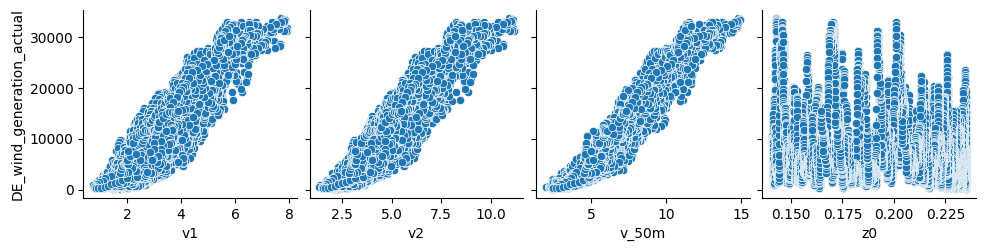

In [28]:
sns.pairplot(combined, x_vars=['v1', 'v2', 'v_50m', 'z0'], y_vars=['DE_wind_generation_actual'])



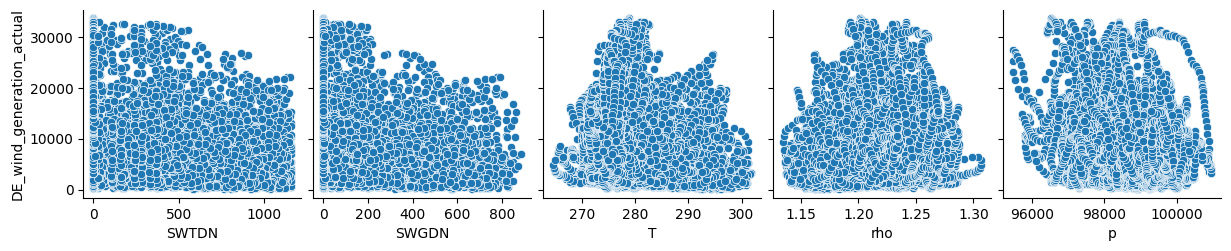

In [29]:
sns.pairplot(combined, x_vars=['SWTDN', 'SWGDN', 'T', 'rho', 'p'], y_vars=['DE_wind_generation_actual'])


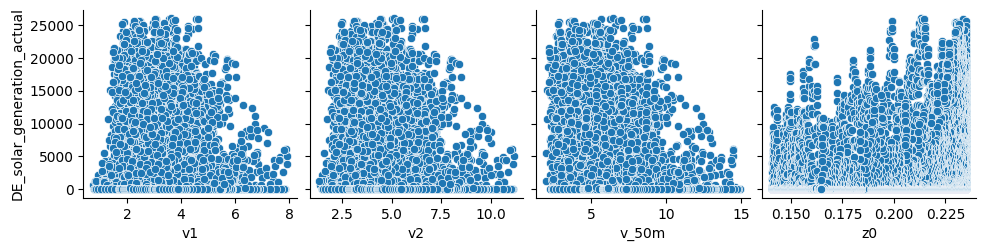

In [30]:
sns.pairplot(combined, x_vars=['v1', 'v2', 'v_50m', 'z0'], y_vars=['DE_solar_generation_actual'])


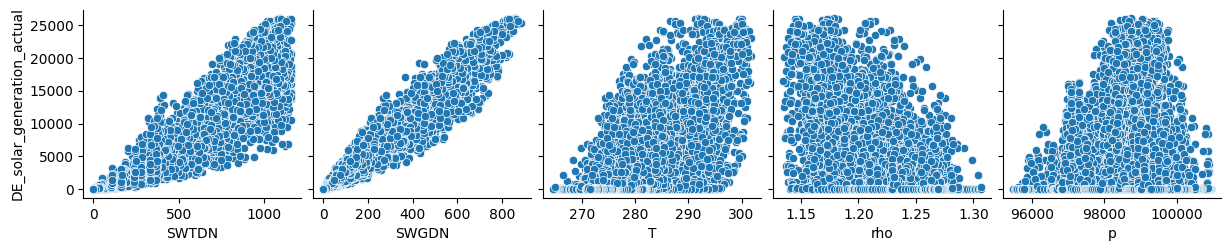

In [31]:
sns.pairplot(combined, x_vars=['SWTDN', 'SWGDN', 'T', 'rho', 'p'], y_vars=['DE_solar_generation_actual'])


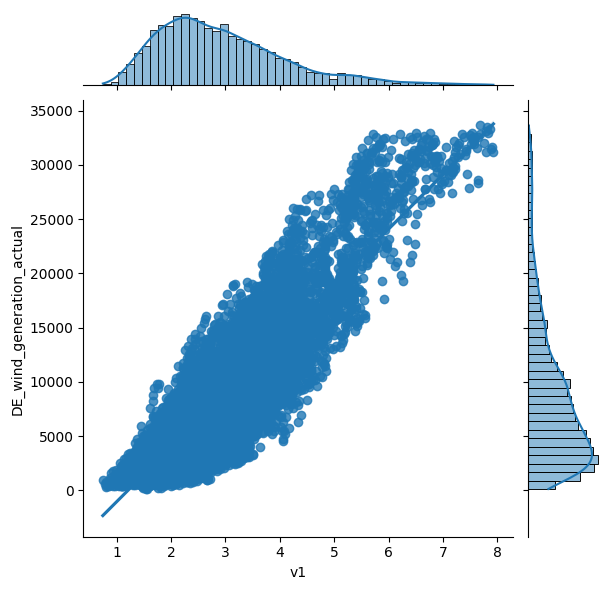

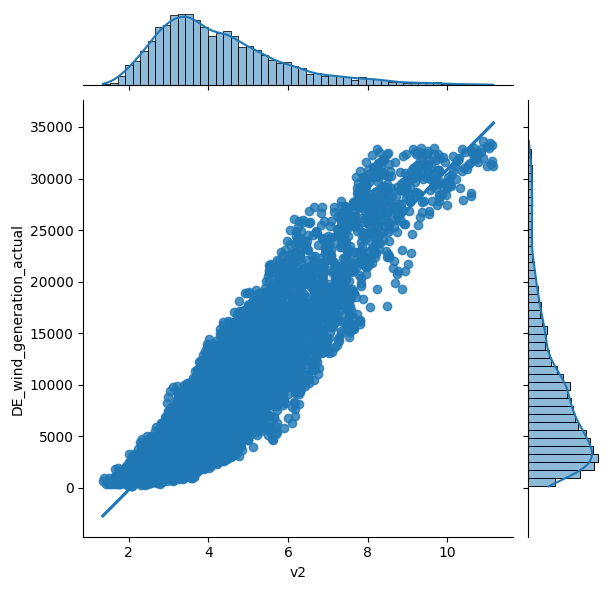

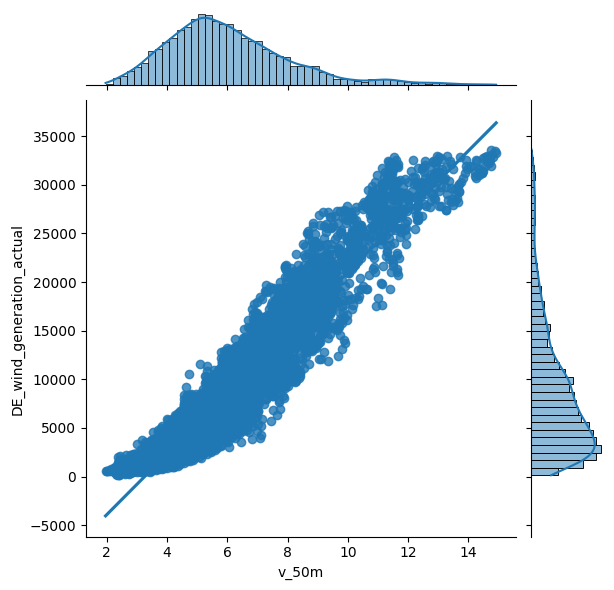

In [32]:
sns.jointplot(x='v1', y='DE_wind_generation_actual', data=combined, kind='reg')
sns.jointplot(x='v2', y='DE_wind_generation_actual', data=combined, kind='reg')
sns.jointplot(x='v_50m', y='DE_wind_generation_actual', data=combined, kind='reg')


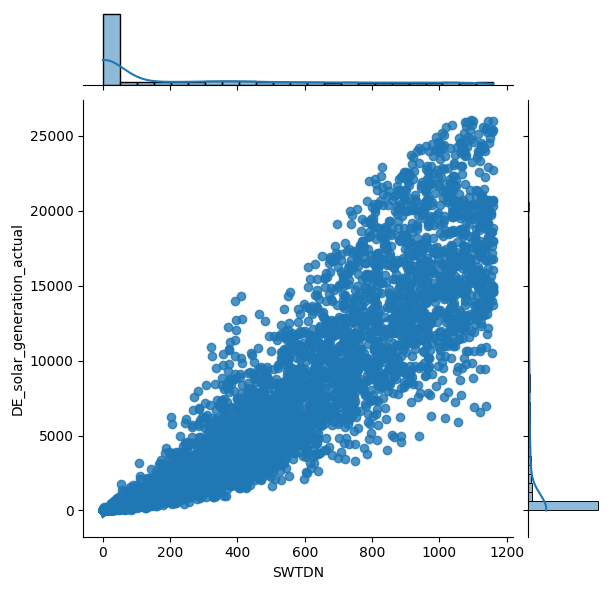

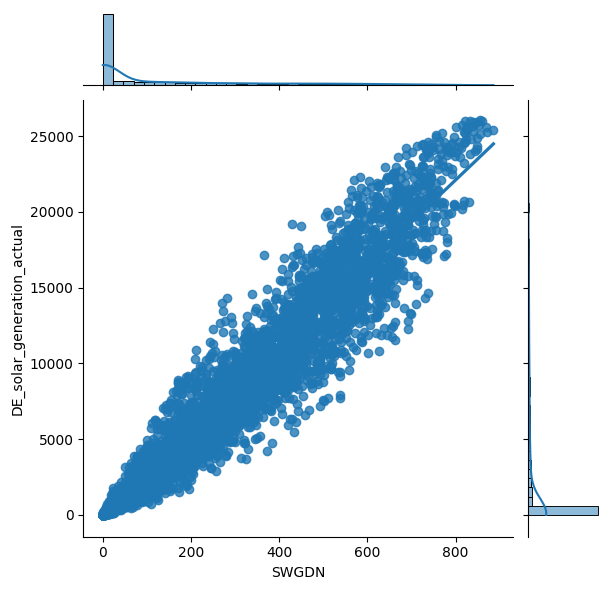

In [33]:
sns.jointplot(x='SWTDN', y='DE_solar_generation_actual', data=combined, kind='reg')
sns.jointplot(x='SWGDN', y='DE_solar_generation_actual', data=combined, kind='reg')


In [48]:
# import necessary modules
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
# instantiate LinearRegression
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

#from sklearn.model_selection import train_test_split
#train_set,test_set=train_test_split(production ,test_size=0.2,random_state=42)

In [49]:
combined=combined.dropna(subset=['DE_solar_generation_actual'])
combined.isnull().sum()
X_solar = combined[['SWTDN', 'SWGDN', 'T']]
Y_solar = combined['DE_solar_generation_actual']

In [54]:

scores_solar = cross_val_score(dt, X_solar, Y_solar,cv=5,error_score='raise')
print(scores_solar, "\naverage =", np.mean(scores_solar))


[0.72994474 0.8887667  0.90801534 0.9401544  0.82152772] 
average = 0.8576817779675959


In [55]:
scores_solar = cross_val_score(lr, X_solar, Y_solar,cv=5,error_score='raise')
print(scores_solar, "\naverage =", np.mean(scores_solar))


[0.88997699 0.95302251 0.95591745 0.95045437 0.87382238] 
average = 0.9246387377264398


In [53]:
scores_solar = cross_val_score(rf, X_solar, Y_solar,cv=5,error_score='raise')
print(scores_solar, "\naverage =", np.mean(scores_solar))


[0.85225935 0.94526758 0.94708967 0.95513594 0.87467786] 
average = 0.9148860804015643


In [37]:
combined=combined.dropna(subset=['DE_wind_generation_actual'])
combined.isnull().sum()
X_wind = combined[['v1', 'v2', 'v_50m', 'z0']]
y_wind = combined['DE_wind_generation_actual']



In [61]:
scores_wind = cross_val_score(lr, X_wind, y_wind, cv=5)
print(scores_wind, "\naverage =", np.mean(scores_wind))



[0.84708392 0.88861781 0.81771924 0.88321327 0.8573129 ] 
average = 0.8587894275260812


In [56]:
scores_wind = cross_val_score(dt, X_wind, y_wind, cv=5)
print(scores_wind, "\naverage =", np.mean(scores_wind))


[0.81609803 0.73746999 0.73301223 0.76313755 0.86008029] 
average = 0.7819596178432315


In [57]:
scores_wind = cross_val_score(rf, X_wind, y_wind, cv=5)
print(scores_wind, "\naverage =", np.mean(scores_wind))


[0.87366782 0.82133341 0.85453284 0.90127681 0.89669097] 
average = 0.8695003708718543


In [64]:
from joblib import dump,load
dump(lr,'FINAL.joblib')

['FINAL.joblib']

In [1]:
#from sklearn.pipeline import Pipeline
#pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
#pipe.fit(X, y)
#features=([[1, 33, 1, 1]])
#lr.predict(features)